In [1]:
import requests 'libraries that are needed'
from bs4 import BeautifulSoup
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [17]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

'scapping the web'

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,cNot Verified | I had hoped this would be a g...
1,✅ Trip Verified | I was going to fly to Frank...
2,✅ Trip Verified | Much better experience this ...
3,✅ Trip Verified | Once again a terrible busine...
4,✅ Trip Verified | BA A380's are showing their...


In [24]:
# converting the extracted infromation in csv file to computer path

df.to_csv("BA_reviews.csv") 
csv_file_path = "BA_reviews.csv"

# Write the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"Data has been successfully saved to {csv_file_path}")

Data has been successfully saved to BA_reviews.csv


In [35]:
#spiliting the unwanted words from the review

df.reviews= df.reviews.str.split('|',expand=True)

# Display the modified DataFramdf
df

,Unnamed: 0,reviews
0,0,I had hoped this would be a good review but ...
1,17,"Boarded on time, but it took ages to get to ..."
2,19,\r\nWe traveled to Lisbon for our dream vaca...
3,23,"Angry, disappointed, and unsatisfied. My rou..."
4,25,"A totally unremarkable flight, on time, as c..."
...,...,...
216,924,Madrid to London. We paid for business class...
217,931,Larnaca to London. This A320 is totally unsu...
218,963,Flew out of Heathrow on 22nd Feb to New York...
219,978,London to Tampa. BA broke my suitcase and I ...


In [ ]:
#Data Preprocessing

In [36]:
import re

# Define a function to clean the text

def clean(text):
    
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews
0,0,I had hoped this would be a good review but ...,I had hoped this would be a good review but u...
1,17,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...
2,19,\r\nWe traveled to Lisbon for our dream vaca...,We traveled to Lisbon for our dream vacation ...
3,23,"Angry, disappointed, and unsatisfied. My rou...",Angry disappointed and unsatisfied My route w...
4,25,"A totally unremarkable flight, on time, as c...",A totally unremarkable flight on time as comf...


In [37]:
 '''punkt It generates a list of sentences from a text by developing a model for words that start sentences, 
prepositional phrases, and abbreviations using an unsupervised technique.'''
    
    # nltk is used to convert the custormer reviews (human language) to a Statisticle language (NLP)
    
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...


In [40]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [42]:
#dictionary to separate the words with (j as new word, V as verb, N as noun , R adverb) to teach the model

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,POS tag
0,0,I had hoped this would be a good review but ...,I had hoped this would be a good review but u...,"[(hoped, v), (would, None), (good, a), (review...","[(hoped, v), (would, None), (good, a), (review..."
1,17,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)...","[(Boarded, v), (time, n), (took, v), (ages, n)..."
2,19,\r\nWe traveled to Lisbon for our dream vaca...,We traveled to Lisbon for our dream vacation ...,"[(traveled, v), (Lisbon, n), (dream, n), (vaca...","[(traveled, v), (Lisbon, n), (dream, n), (vaca..."
3,23,"Angry, disappointed, and unsatisfied. My rou...",Angry disappointed and unsatisfied My route w...,"[(Angry, n), (disappointed, v), (unsatisfied, ...","[(Angry, n), (disappointed, v), (unsatisfied, ..."
4,25,"A totally unremarkable flight, on time, as c...",A totally unremarkable flight on time as comf...,"[(totally, r), (unremarkable, a), (flight, n),...","[(totally, r), (unremarkable, a), (flight, n),..."


In [49]:
''' here in this cell we are introducing Stemming and lemmentization 
Stemming : removing the choping of meaningless root word 
Lemmentization : gives the meaningful rootwords'''

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def stem_and_lemmatize(words):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    stemmed_and_lemmatized = []
    
    for word in words:
        stem = stemmer.stem(word)
        lemma = lemmatizer.lemmatize(word)
        
        # Only add to the result if stem is not equal to the lemma
        if stem != lemma:
            stemmed_and_lemmatized.append(lemma)
    
    return stemmed_and_lemmatized


df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,POS tag,Lemma
0,0,I had hoped this would be a good review but ...,I had hoped this would be a good review but u...,"[(hoped, v), (would, None), (good, a), (review...","[(hoped, v), (would, None), (good, a), (review...",hop would good review unfortunately flew bus...
1,17,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)...","[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...
2,19,\r\nWe traveled to Lisbon for our dream vaca...,We traveled to Lisbon for our dream vacation ...,"[(traveled, v), (Lisbon, n), (dream, n), (vaca...","[(traveled, v), (Lisbon, n), (dream, n), (vaca...",travel Lisbon dream vacation cruise Portugal...
3,23,"Angry, disappointed, and unsatisfied. My rou...",Angry disappointed and unsatisfied My route w...,"[(Angry, n), (disappointed, v), (unsatisfied, ...","[(Angry, n), (disappointed, v), (unsatisfied, ...",Angry disappoint unsatisfied route London At...
4,25,"A totally unremarkable flight, on time, as c...",A totally unremarkable flight on time as comf...,"[(totally, r), (unremarkable, a), (flight, n),...","[(totally, r), (unremarkable, a), (flight, n),...",totally unremarkable flight time comfortable...


In [47]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I had hoped this would be a good review but ...,hop would good review unfortunately flew bus...
1,"Boarded on time, but it took ages to get to ...",Boarded time take age get runway due congest...
2,\r\nWe traveled to Lisbon for our dream vaca...,travel Lisbon dream vacation cruise Portugal...
3,"Angry, disappointed, and unsatisfied. My rou...",Angry disappoint unsatisfied route London At...
4,"A totally unremarkable flight, on time, as c...",totally unremarkable flight time comfortable...
...,...,...
216,Madrid to London. We paid for business class...,Madrid London pay business class pay specifi...
217,Larnaca to London. This A320 is totally unsu...,Larnaca London totally unsuitable flight len...
218,Flew out of Heathrow on 22nd Feb to New York...,Flew Heathrow nd Feb New York mins flight no...
219,London to Tampa. BA broke my suitcase and I ...,London Tampa BA break suitcase make fuss get...


In [52]:
!pip install vaderSentiment

In [53]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources if not already downloaded
nltk.download('vader_lexicon')

def calculate_vader_sentiment(text):
    # Create a SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Calculate sentiment scores
    sentiment_scores = sia.polarity_scores(text)

    # Return the compound sentiment score
    return sentiment_scores['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...


In [55]:
df['Sentiment'] = df['Lemma'].apply(calculate_vader_sentiment)

In [56]:
# we define a function to analysis the sentiment score and return positive or negative 

def analyze_sentiment(vader_score):
    if vader_score > 0.5:
        return "Positive"
    elif vader_score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Analysis'] = df['Sentiment'].apply(analyze_sentiment)
df.head()


,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,POS tag,Lemma,Sentiment,Analysis
0,0,I had hoped this would be a good review but ...,I had hoped this would be a good review but u...,"[(hoped, v), (would, None), (good, a), (review...","[(hoped, v), (would, None), (good, a), (review...",hop would good review unfortunately flew bus...,0.6068,Positive
1,17,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)...","[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...,0.4404,Neutral
2,19,\r\nWe traveled to Lisbon for our dream vaca...,We traveled to Lisbon for our dream vacation ...,"[(traveled, v), (Lisbon, n), (dream, n), (vaca...","[(traveled, v), (Lisbon, n), (dream, n), (vaca...",travel Lisbon dream vacation cruise Portugal...,0.8020,Positive
3,23,"Angry, disappointed, and unsatisfied. My rou...",Angry disappointed and unsatisfied My route w...,"[(Angry, n), (disappointed, v), (unsatisfied, ...","[(Angry, n), (disappointed, v), (unsatisfied, ...",Angry disappoint unsatisfied route London At...,-0.6486,Negative
4,25,"A totally unremarkable flight, on time, as c...",A totally unremarkable flight on time as comf...,"[(totally, r), (unremarkable, a), (flight, n),...","[(totally, r), (unremarkable, a), (flight, n),...",totally unremarkable flight time comfortable...,0.4601,Neutral


In [57]:
# count the vader analysis
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    100
Negative     92
Neutral      29
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1a2cf0b2650>,
 [Text(0.16357832527070265, 1.0877693374523996, 'Positive'),
  Text(-0.5857080393550825, -0.9310993999755478, 'Negative'),
  Text(1.0078459457131805, -0.4407341031841136, 'Neutral')],
 [Text(0.08922454105674689, 0.5933287295194907, '45.2%'),
  Text(-0.31947711237549953, -0.5078723999866624, '41.6%'),
  Text(0.5497341522071894, -0.2404004199186074, '13.1%')])

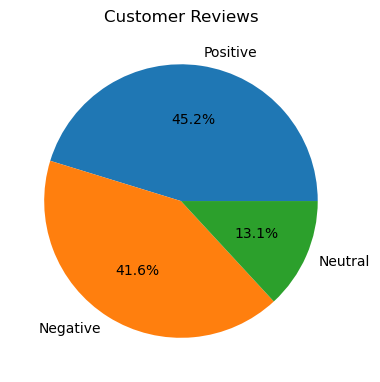

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Customer Reviews")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0), autopct='%1.1f%%', shadow=False)


In [66]:
pip install wordcloud



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------------------- -------------------- 143.4/300.2 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00


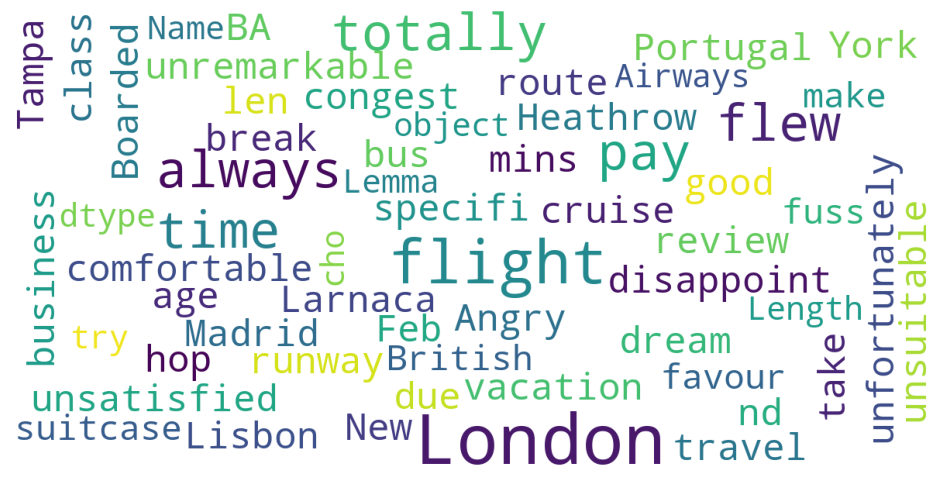

In [85]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)
